# TP :  Prédictions des diabètes avec arbres de décisions 

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split


## Importing the dataset

In [4]:
dataset = pd.read_csv('data/TP Arbre decision/diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Creating the model

In [6]:
model = tree.DecisionTreeClassifier()


## splitting train and test 

In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(dataset.loc[:, dataset.columns != 'Outcome'], dataset['Outcome'], train_size=0.8)


## fitting model

In [11]:

model.fit(X_train, y_train)


DecisionTreeClassifier()

## score

In [17]:
accuracy = model.score(X_test, y_test)
print("Accuracy: ", round(accuracy,2)*100,"%")


Accuracy:  66.0 %


## visualisation

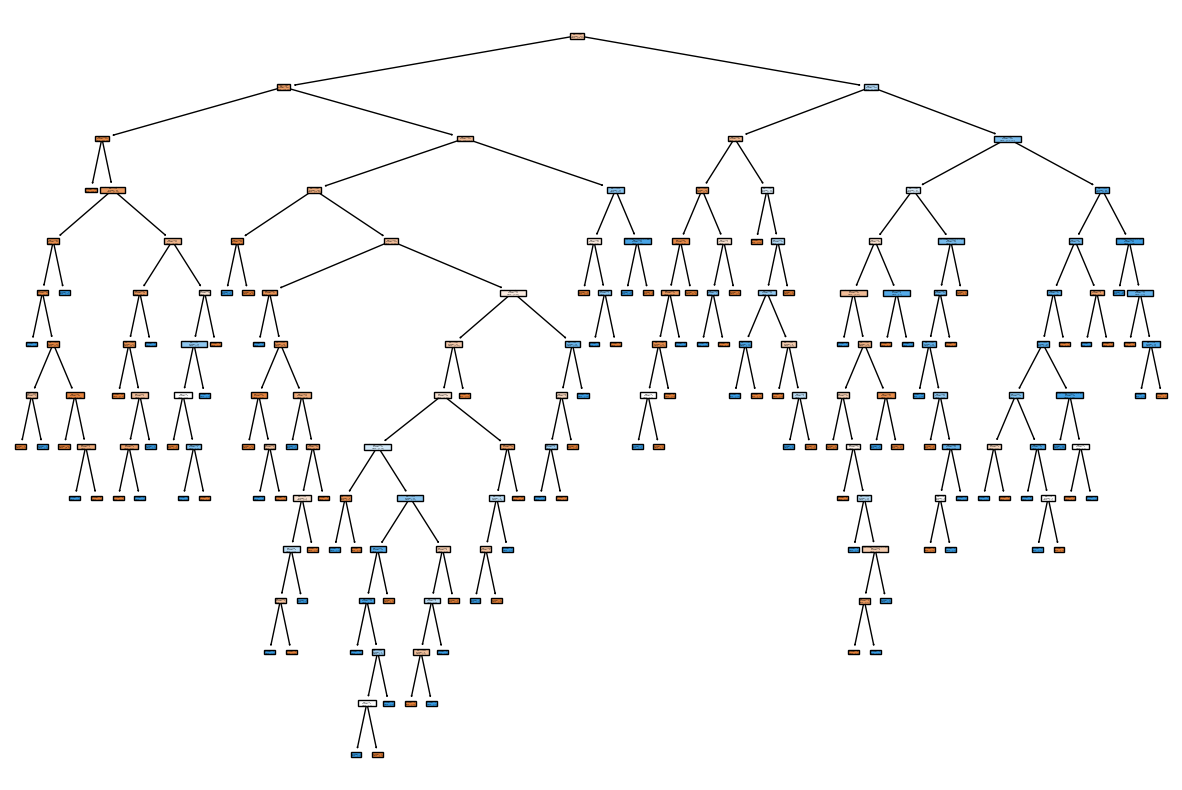

In [18]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True, feature_names=dataset.columns)
plt.show()


## metrics

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix

<Axes: >

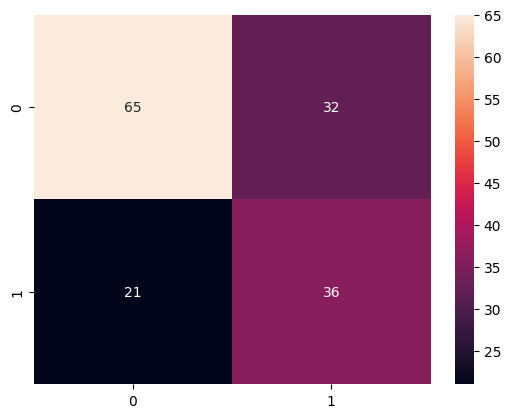

In [21]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')


In [22]:
print("Accuracy: ", round(accuracy_score(y_test, y_pred),2)*100,"%")

Accuracy:  66.0 %


## logistic regression

In [23]:
# use logistic regression
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.predict(X_test)


C:\Users\boula\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## confusion matrix

<Axes: >

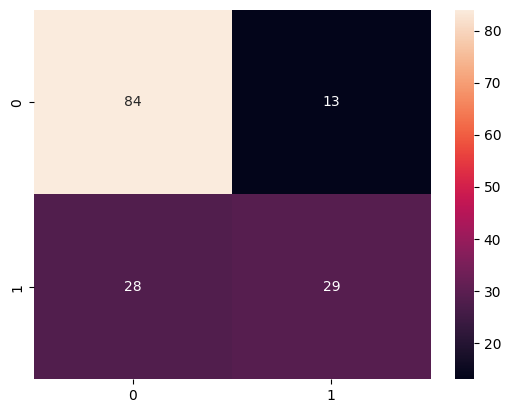

In [24]:

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d')


## comparing models

In [25]:

print("Accuracy of Decision Tree: ", round(accuracy_score(y_test, y_pred),2)*100,"%")
print("Accuracy of Logistic Regression: ", round(accuracy_score(y_test, y_pred_logistic),2)*100,"%")


Accuracy of Decision Tree:  66.0 %
Accuracy of Logistic Regression:  73.0 %


logistic regression is better in this case